In [5]:
!pip install --upgrade -q networkx

In [97]:
!pip install -q neo4j-driver

# Graph Analytics with NetworkX

In [6]:
import networkx as nx

In [12]:
from random import randint as rw

## Representing Graph Data

* edge list:  $[(u, v, w), \dots ]$ 
    * where $u$ is a nodeID, 
    * $v$ is a nodeID, and 
    * $w$ is a set of key-value pairs 
        * which represents  the relationship's weight

In [16]:
people = range(4)
three = [ (u, v, {'loves': rw(0, 5)}) 
     for u in people for v in people if u != v ]

In [21]:
three[0]

(0, 1, {'loves': 1})

In [17]:
G = nx.from_edgelist(three, nx.DiGraph)

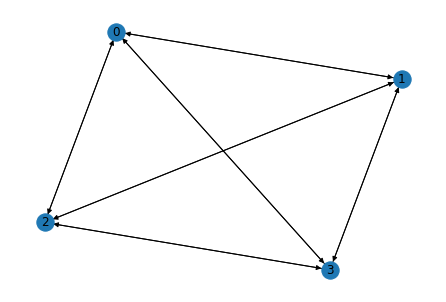

In [20]:
nx.draw(G, with_labels=True);

In [23]:
list(nx.bfs_edges(G, source=0))

[(0, 1), (0, 2), (0, 3)]

In [24]:
list(nx.dfs_edges(G, source=0))

[(0, 1), (1, 2), (2, 3)]

In [26]:
G.nodes()

NodeView((0, 1, 2, 3))

In [27]:
G.edges()

OutEdgeView([(0, 1), (0, 2), (0, 3), (1, 0), (1, 2), (1, 3), (2, 0), (2, 1), (2, 3), (3, 0), (3, 1), (3, 2)])

In [29]:
G.edges(data=True)

OutEdgeDataView([(0, 1, {'loves': 1}), (0, 2, {'loves': 2}), (0, 3, {'loves': 3}), (1, 0, {'loves': 3}), (1, 2, {'loves': 4}), (1, 3, {'loves': 3}), (2, 0, {'loves': 3}), (2, 1, {'loves': 4}), (2, 3, {'loves': 0}), (3, 0, {'loves': 0}), (3, 1, {'loves': 1}), (3, 2, {'loves': 2})])

## Analysing Real-World Datasets

In [31]:
import pandas as pd

In [32]:
file = '../10-Graphs/data/sociopatterns-infectious/out.sociopatterns-infectious'

df = pd.read_csv(file, sep=' ', skiprows=2, header=None)

In [33]:
df.sample(3)

,0,1,2,3
948,120,125,1,1247660259
9368,28,29,1,1247655139
8186,262,263,1,1247668799


In [39]:
edges = df.rename(columns={0: 'u', 1: 'v', 2: 'w'})
edges = edges.drop(columns=[3])

In [40]:
edges.sample(3)

,u,v,w
1805,13,16,1
14668,42,73,1
9100,281,283,1


In [46]:
G = nx.Graph()

In [47]:
for row in edges.iterrows():
    u, v, w = row[1]
    
    if G.has_edge(u, v):
        G.edges[u, v]['freq'] += 1
    else:
        G.add_edge(u, v, freq=1)

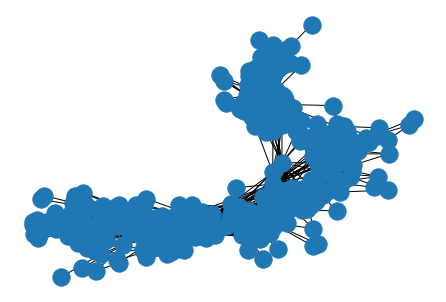

In [50]:
nx.draw(G);

In [51]:
for n in sorted(G.nodes()):
    G.node[n]['order'] = float(n)

In [54]:
G.nodes[101]

{'order': 101.0}

In [56]:
len(G.nodes()), len(G.edges())

(410, 2765)

### Importance: Centrality

In [58]:
list(G.neighbors(101))

[100, 102, 103, 105, 109, 110, 113, 90, 91, 93, 94, 95, 97]

In [61]:
len(list(G.neighbors(101)))

13

In [88]:
ranked = { n : len(list(G.neighbors(n)))  for n in sorted(G.nodes()) }

In [66]:
ranked[101]

13

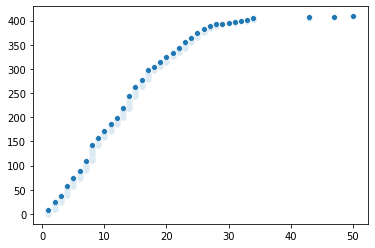

In [95]:
import seaborn as sns

sns.scatterplot(sorted(list(ranked.values())), range(len(ranked)));

In [82]:
dc = list(sorted(nx.degree_centrality(G).values()))
nid = range(len(dc))

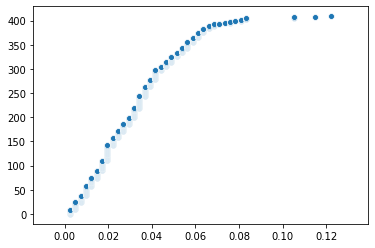

In [83]:
sns.scatterplot(dc, nid);

# Graph Databases

* Go to https://neo4j.com/sandbox

* Launch Free Sandbox
    * You will need to use a real email address
        * you can use, eg., https://10minutemail.com
        
    * create a new project (any), eg., recommendations
    
    * open neo4j browser (button)
        * scroll down to "Learn Neo4j"
        